In [1]:
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
import urllib

# Load DB data

In [2]:
def connect_db():
    username =  ''
    password =  urllib.parse.quote('')
    ip = ''
    port = ''
    db_name = ''
    mongodb_URI = f"mongodb://{username}:{password}@{ip}:{port}/{db_name}"
    client = MongoClient(mongodb_URI)
    db = client[db_name]
    return db

In [3]:
def read_mongo(db, collection, query={}, no_id=True):
    """ Read from Mongo and Store into DataFrame """
    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return df

In [4]:
db = connect_db()
query = {"video_name": {'$regex':'^2017'}}
collection = 'N1SeminarRoom825_label'
df = read_mongo(db, collection, query=query, no_id=True)

# visualize activity status

In [5]:
df['date'] = df['video_name'].str[:8]
df['date'] = pd.to_datetime(df['date'])

In [31]:
start='20170901'
end='20171231'

In [7]:
df = df.sort_values('date')
val_date = df.date.unique()
period = pd.date_range(start=start, end=end)
y = [True if d in val_date else False for d in period]

In [8]:
df_ = pd.DataFrame({'date': period, 'valid': y})
df_["date"] = df_.date.apply(lambda x: x.strftime("%y-%m-%d"))
pivot = df_.pivot_table(columns='date', values="valid", aggfunc='sum')

<AxesSubplot:title={'center':'Existence of activity'}, xlabel='date'>

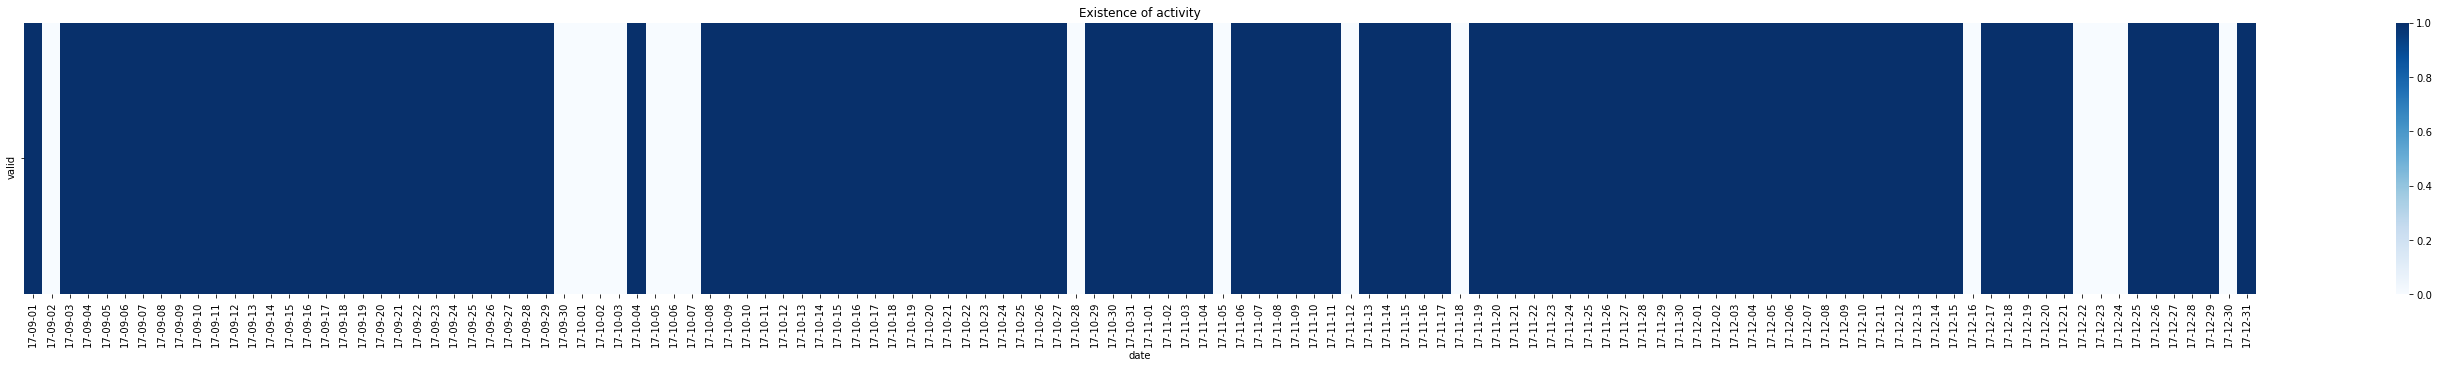

In [9]:
fig, ax = plt.subplots(figsize=(50,5))    # figsize
ax.set_title('Existence of activity')
# ax.set_xticklabels(df_['date'], rotation=50)
sns.heatmap(pivot, cmap="Blues",           # cmap Color
                 annot=False)  

# visualize video status

In [27]:
import os

In [28]:
os.listdir()

['video_heatmap_20_1.pdf',
 'video_heatmap_17.pdf',
 'video_heatmap.pdf',
 'activity_heatmap_17.pdf',
 'video_heatmap_20_2.pdf',
 'visualization.ipynb',
 'activity_heatmap.jpg.pdf',
 'togepi',
 'activity_heatmap_20_2.pdf',
 'activity_heatmap_20_1.pdf',
 'video_heatmap_19_2.pdf',
 'nas']

In [29]:
folder_path = '/home/taehoon/labeling/vis/nas'
month_list = ['201901', '201902', '201903', '201904', '201905', '201906']
folder_list = os.listdir(folder_path)
folder_list = [f for f in folder_list if f[:6] in month_list]

In [32]:
num_video = {}
for folder in folder_list:
    num_video[folder] = len(os.listdir(os.path.join(folder_path, folder)))
    # num_video[folder] = len(os.listdir(os.path.join(folder_path, folder, 'HSL-492641-GLULE')))

In [33]:
# folder_path = '/home/taehoon/labeling/vis/nas'
# # month_list = ['202101', '202102', '202103', '202104', '202105']
# month_list = ['202001', '202002', '202003', '202004', '202005', '202006']
# folder_list = os.listdir(folder_path)
# folder_list = [f for f in folder_list if f[:6] in month_list]
# for folder in folder_list:
#     num_video[folder] = len(os.listdir(os.path.join(folder_path, folder)))

In [34]:
period = pd.date_range(start=start, end=end)
y = [num_video[d.strftime('%Y%m%d')] if d.strftime('%Y%m%d') in num_video.keys() else 0.0 for d in period]

In [35]:
df_ = pd.DataFrame({'date': period, 'valid': y})
df_["date"] = df_.date.apply(lambda x: x.strftime("%y-%m-%d"))
pivot = df_.pivot_table(columns='date', values="valid", aggfunc='sum')

<AxesSubplot:title={'center':'Existence of videos'}, xlabel='date'>

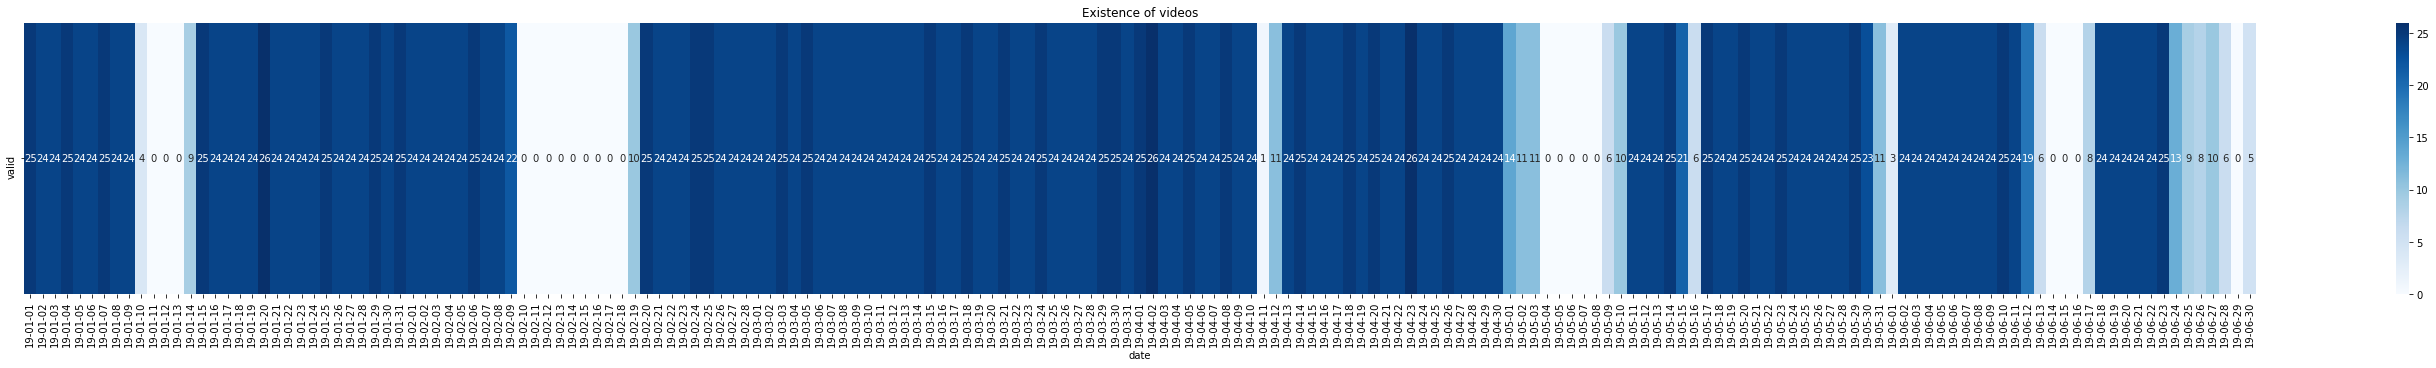

In [36]:
fig, ax = plt.subplots(figsize=(50,5))    # figsize
ax.set_title('Existence of videos')
# ax.set_xticklabels(df_['date'], rotation=50)
sns.heatmap(pivot, cmap="Blues",           # cmap Color
                 annot=True)  

In [1]:
df.describe()

NameError: name 'df' is not defined

In [12]:
months = ['201709', '201710', '201711', '201712']
videos = df['video_name'].unique().tolist()

In [25]:
for month in months:
    with open(f'{month}.txt', 'w+') as lf:
        video_list = [v for v in videos if v.startswith(month)]
        lf.write('\n'.join(video_list))